In [ ]:
#student number and name: C00305107 Samuel Asuoha

In [16]:
import requests
from requests.exceptions import HTTPError
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import json



In [17]:
# Part 1: TheAudioDB API Integration
# API URL and parameters
api_url = "https://www.theaudiodb.com/api/v1/json/2/search.php"
artist_name = "Drake"  
params = {"s": artist_name}

try:
    # Fetch data from TheAudioDB API 
    response = requests.get(api_url, params=params) 
    response.raise_for_status()

    if response.content:
        try:
            data = response.json()
        except json.JSONDecodeError:
            raise ValueError("Invalid JSON response.")
    else:
        raise ValueError("Empty response from API")
    
    # Extract artist information
    artist_data = data.get("artists")
    if not artist_data:
        raise ValueError("No data found for the specified artist.")

    artist_info = artist_data[0]
    artist_name = artist_info.get("strArtist", "Unknown")
    artist_genre = artist_info.get("strGenre", "Unknown")
    artist_biography = artist_info.get("strBiographyEN", "No biography available.")

    print(f"Artist: {artist_name}")
    print(f"Genre: {artist_genre}")
    print(f"Biography: {artist_biography[:200]}...")  # Print the first 200 characters of the biography

except requests.exceptions.HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except ValueError as val_err:
    print(f"Value error: {val_err}")
except Exception as err:
    print(f"Other error occurred: {err}")

Value error: Empty response from API


Skipping invalid data in row: [<td>Total
</td>, <td>-
</td>, <td>165.5
</td>, <td>2617
</td>, <td>20
</td>, <td>13
</td>, <td>9
</td>, <td>10
</td>, <td>1
</td>, <td>2
</td>, <td>2
</td>, <td>-
</td>]
Error scraping the wiki page: list index out of range


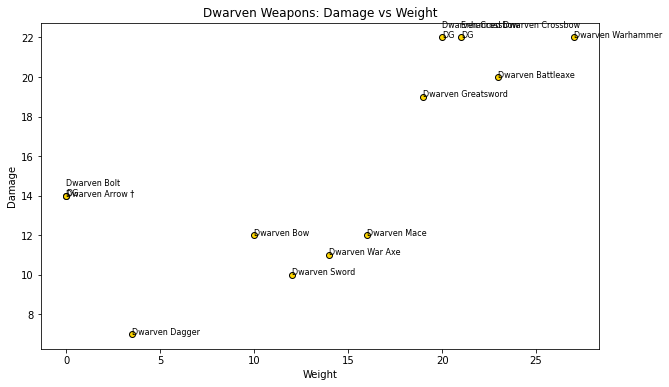

In [20]:
# Part 2: Scraping Dwarven Weapons Data
wiki_url = "https://elderscrolls.fandom.com/wiki/Dwarven_Weapons_(Skyrim)"
try:
    # Fetch the webpage content
    response = requests.get(wiki_url)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, "html.parser")

    # Extract the table data
    table = soup.find("table", class_="wikitable")
    if not table:
        raise ValueError("Could not find the required table on the wiki page.")

    rows = table.find_all("tr")

    # Parse weapon data
    weapon_names = []
    weapon_damages = []
    weapon_weights = []

    for row in rows[1:]:  # Skips the header row
        cols = row.find_all("td")
        if len(cols) > 2:
            weapon_names.append(cols[0].text.strip())
            try:
                weapon_damages.append(float(cols[1].text.strip()))
                weapon_weights.append(float(cols[2].text.strip()))
            except ValueError:
                print(f"Skipping invalid data in row: {cols}")

    # Visualize weapon data
    plt.figure(figsize=(10, 6))
    plt.scatter(weapon_weights, weapon_damages, color="gold", edgecolor="black")
    plt.xlabel("Weight")
    plt.ylabel("Damage")
    plt.title("Dwarven Weapons: Damage vs Weight")
    for i, name in enumerate(weapon_names):
        plt.text(weapon_weights[i], weapon_damages[i], name, fontsize=8)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("dwarven_weapons_plot.png")
    plt.show()

except HTTPError as http_err:
    print(f"HTTP error occurred: {http_err}")
except Exception as err:
    print(f"Error scraping the wiki page: {err}")